In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('bmh')

In [3]:
df_test = pd.read_csv(r'C:\Temp\pipeline\data-science-pipeline\competitions\house-prices-advanced-regression-techniques\data\test.csv')
df_train = pd.read_csv(r'C:\Temp\pipeline\data-science-pipeline\competitions\house-prices-advanced-regression-techniques\data\train.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df = pd.concat([df_train, df_test], axis = 0, sort = False).reset_index()

In [7]:
df.describe

<bound method NDFrame.describe of       index    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0         0     1          60       RL         65.0     8450   Pave   NaN   
1         1     2          20       RL         80.0     9600   Pave   NaN   
2         2     3          60       RL         68.0    11250   Pave   NaN   
3         3     4          70       RL         60.0     9550   Pave   NaN   
4         4     5          60       RL         84.0    14260   Pave   NaN   
...     ...   ...         ...      ...          ...      ...    ...   ...   
2914   1454  2915         160       RM         21.0     1936   Pave   NaN   
2915   1455  2916         160       RM         21.0     1894   Pave   NaN   
2916   1456  2917          20       RL        160.0    20000   Pave   NaN   
2917   1457  2918          85       RL         62.0    10441   Pave   NaN   
2918   1458  2919          60       RL         74.0     9627   Pave   NaN   

     LotShape LandContour  ... PoolArea P

In [8]:
missing = df.isna().sum().div(df.index.max())

In [9]:
df.index.max()

2918

In [10]:
missing

index            0.000000
Id               0.000000
MSSubClass       0.000000
MSZoning         0.001371
LotFrontage      0.166552
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000343
SaleCondition    0.000000
SalePrice        0.500000
Length: 82, dtype: float64

In [11]:
missing

index            0.000000
Id               0.000000
MSSubClass       0.000000
MSZoning         0.001371
LotFrontage      0.166552
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000343
SaleCondition    0.000000
SalePrice        0.500000
Length: 82, dtype: float64

In [12]:
missing = missing[missing.values > 0.25]

In [13]:
missing.head()

Alley          0.932488
FireplaceQu    0.486635
PoolQC         0.996916
Fence          0.804661
MiscFeature    0.964359
dtype: float64

<AxesSubplot:>

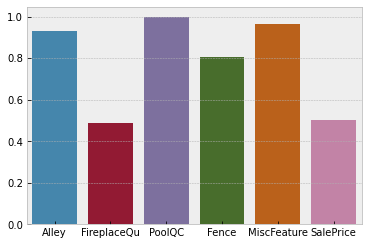

In [14]:
sns.barplot(x = missing.index, y = missing.values)

In [15]:
df = df.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence'], axis = 1)

In [16]:
categorical = df.select_dtypes(include = ['object'])
numerical = df.select_dtypes(exclude = ['object'])

In [17]:
categorical_missing = categorical.isna().sum()

In [18]:
manyna = categorical_missing[categorical_missing > 25].index.tolist()

In [19]:
df[manyna] = df[manyna].fillna('None')

In [20]:
lowna = categorical_missing[categorical_missing <= 25].index.tolist()

In [21]:
df[lowna] = df[lowna].fillna(df[lowna].mode().iloc[0])

In [22]:
numerical_missing = numerical.isna().sum()

In [23]:
numerical_missing

index               0
Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [24]:
test = df[df['GarageType'] == 'None']

In [25]:
test['GarageYrBlt']

39     NaN
48     NaN
78     NaN
88     NaN
89     NaN
        ..
2893   NaN
2909   NaN
2913   NaN
2914   NaN
2917   NaN
Name: GarageYrBlt, Length: 157, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2919 non-null   int64  
 1   Id             2919 non-null   int64  
 2   MSSubClass     2919 non-null   int64  
 3   MSZoning       2919 non-null   object 
 4   LotFrontage    2433 non-null   float64
 5   LotArea        2919 non-null   int64  
 6   Street         2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [27]:
df = df.drop(['GarageCars', 'GarageYrBlt', 'TotRmsAbvGrd'], axis = 1)

In [48]:
stillmissing = df.isna().sum()[df.isna().sum().values != 0]

In [49]:
stillmissing

SalePrice    1441
dtype: int64

In [39]:
lowmis = stillmissing[stillmissing <= 25].index.tolist()

In [40]:
lowmis

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageArea']

In [44]:
df = df.dropna(subset = lowmis, axis = 0)

In [47]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median()) 

C:\Users\kpudu01\AppData\Local\Temp\ipykernel_13840\301696511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())


In [50]:
df = df.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)